In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/football-players-and-staff-faces/football/7981.jpg
/kaggle/input/football-players-and-staff-faces/football/1269.jpg
/kaggle/input/football-players-and-staff-faces/football/6241.jpg
/kaggle/input/football-players-and-staff-faces/football/623.jpg
/kaggle/input/football-players-and-staff-faces/football/2193.jpg
/kaggle/input/football-players-and-staff-faces/football/3750.jpg
/kaggle/input/football-players-and-staff-faces/football/2008.jpg
/kaggle/input/football-players-and-staff-faces/football/5982.jpg
/kaggle/input/football-players-and-staff-faces/football/7737.jpg
/kaggle/input/football-players-and-staff-faces/football/2081.jpg
/kaggle/input/football-players-and-staff-faces/football/6588.jpg
/kaggle/input/football-players-and-staff-faces/football/7966.jpg
/kaggle/input/football-players-and-staff-faces/football/3919.jpg
/kaggle/input/football-players-and-staff-faces/football/6197.jpg
/kaggle/input/football-players-and-staff-faces/football/6399.jpg
/kaggle/input/football-pla

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense,Flatten,Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam
import sys
from PIL import Image

In [3]:
os.listdir('../input/football-players-and-staff-faces/')


['football']

**پیدا کردن سایز تصویر**

In [4]:
imgs_dir = '../input/football-players-and-staff-faces/football'

In [5]:
np.array(Image.open('../input/football-players-and-staff-faces/football/3501.jpg')).shape

(128, 128, 3)

**نمونه عکس‌ها**

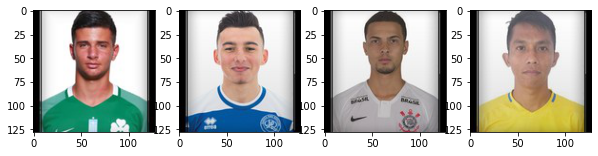

In [6]:
fig, axarr = plt.subplots(1, 4, figsize=(10, 8))
axarr[0].imshow(np.array(Image.open('../input/football-players-and-staff-faces/football/3501.jpg')))
axarr[1].imshow(np.array(Image.open('../input/football-players-and-staff-faces/football/771.jpg')))
axarr[2].imshow(np.array(Image.open('../input/football-players-and-staff-faces/football/1269.jpg')))
axarr[3].imshow(np.array(Image.open('../input/football-players-and-staff-faces/football/3919.jpg')))

In [7]:
img_rows=128
img_cols=128
channels=3
img_shape = (img_rows,img_cols,channels)
zdim=100

In [8]:
data = []
paths = []
for r, d, f in os.walk(r'../input/football-players-and-staff-faces/football'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    x = np.array(img)
    data.append(x)

x_train = np.array(data)
x_train = x_train.reshape(len(data),128,128,3)

1000 [D loss: 0.373814 , acc: 93.75] [G loss: 0.956861]
2000 [D loss: 0.979927 , acc: 24.22] [G loss: 0.547203]
3000 [D loss: 6.730569 , acc: 26.17] [G loss: 0.100057]
4000 [D loss: 3.281624 , acc: 2.73] [G loss: 0.706893]
5000 [D loss: 2.207535 , acc: 24.61] [G loss: 2.988688]
6000 [D loss: 2.224045 , acc: 41.41] [G loss: 6.349153]
7000 [D loss: 0.783791 , acc: 59.38] [G loss: 5.986481]
8000 [D loss: 2.917208 , acc: 60.55] [G loss: 4.120663]
9000 [D loss: 1.553132 , acc: 67.19] [G loss: 3.759344]
10000 [D loss: 5.548691 , acc: 19.92] [G loss: 2.910230]


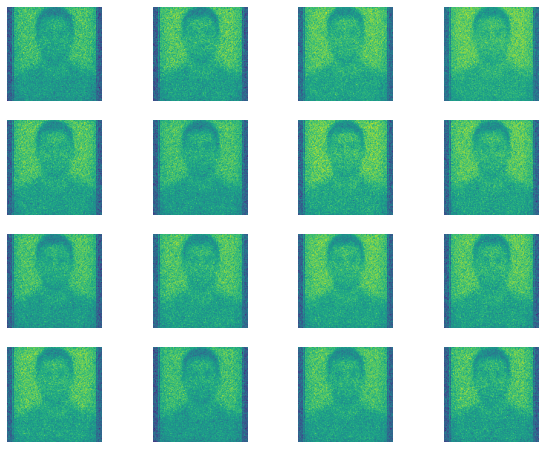

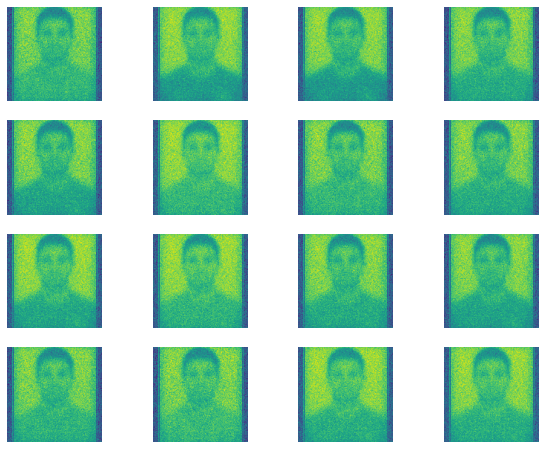

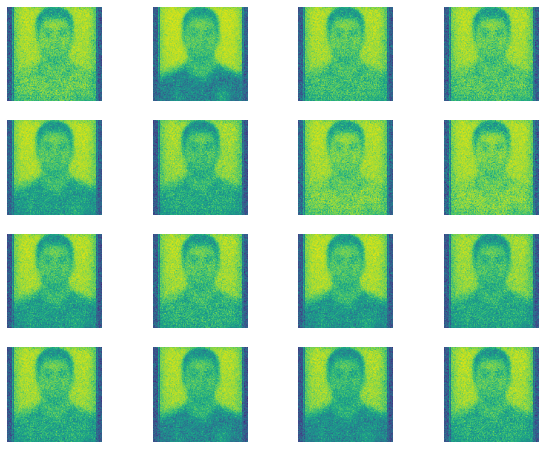

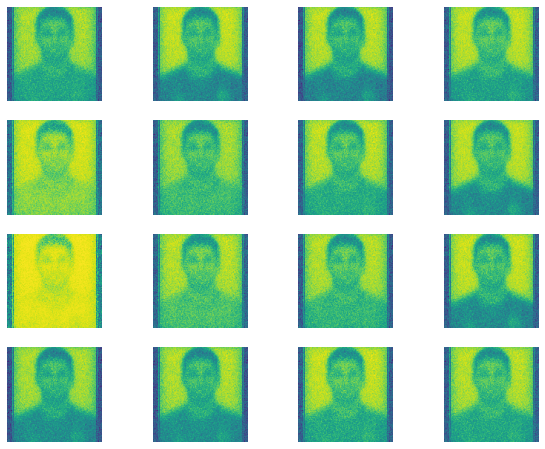

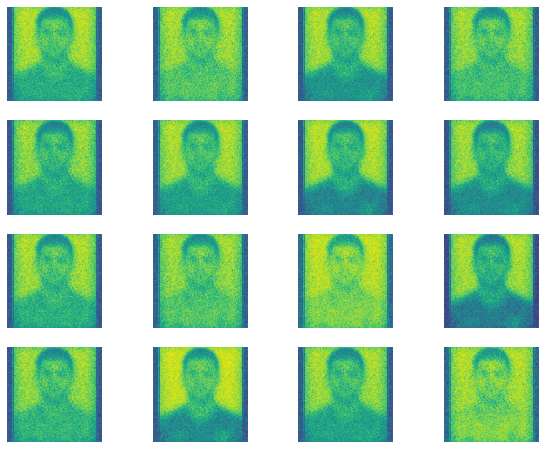

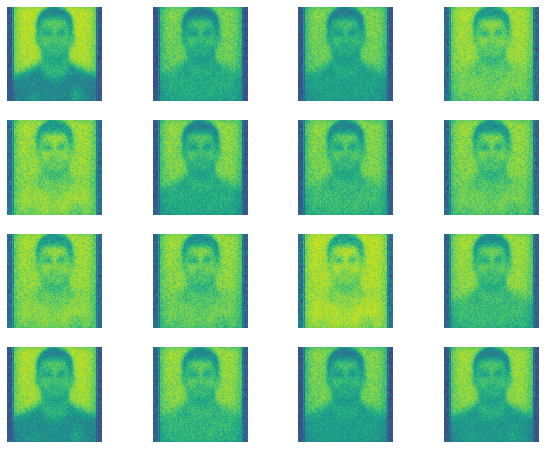

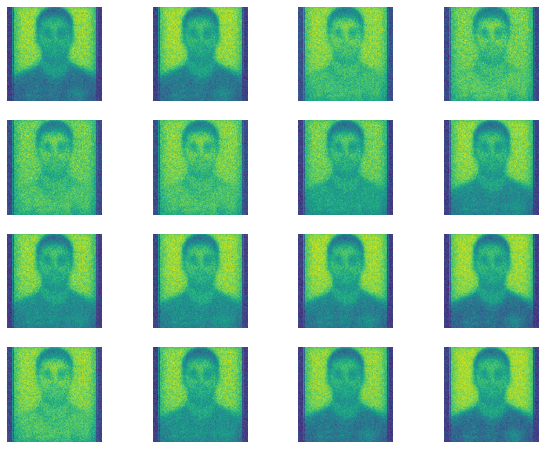

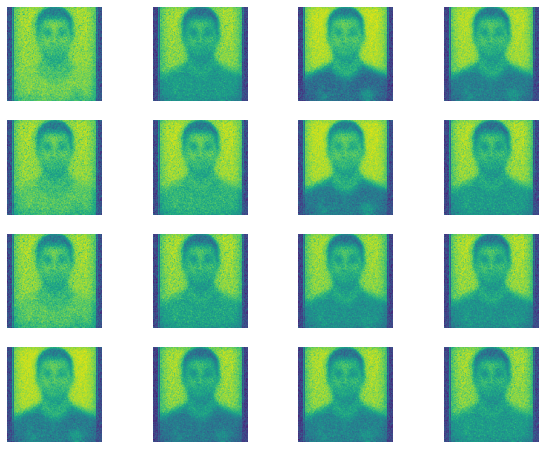

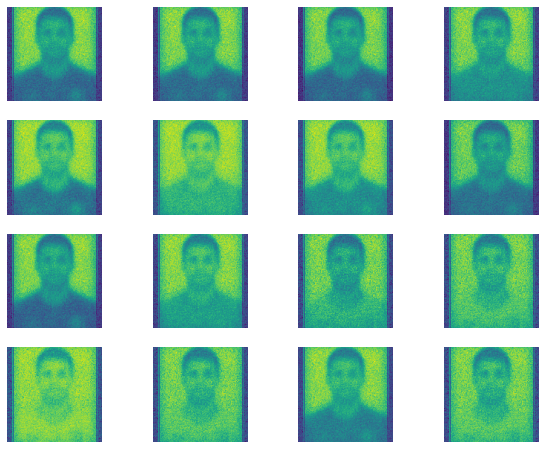

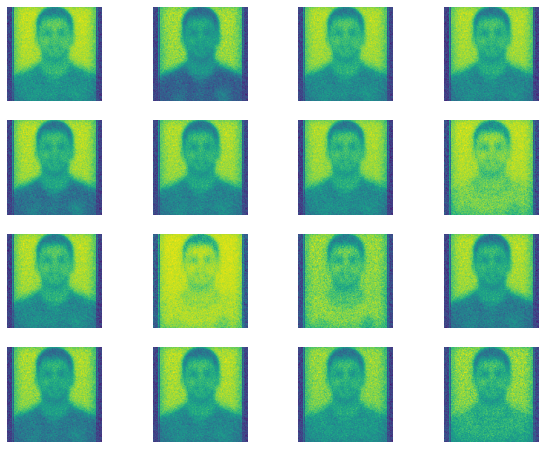

In [9]:
def build_gen(img_shape,zdim):
    model = Sequential()
    model.add(Dense(128,input_dim=zdim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(128*128*3,activation='tanh'))
    model.add(Reshape(img_shape))
    return model

def build_dis(img_shape):
    model=Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

def build_gan(g_model,d_model):
    d_model.trainable=False
    model = Sequential()
    model.add(g_model)
    model.add(d_model)
    opt = Adam(lr=0.0001, beta_1=0.5)   
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

losses=[]
accuracies=[]
iteration_checks=[]

def train(g_model,d_model,gan_model, iterations,batch_size,interval):

   
    
    Xtrain  = x_train
    Xtrain  = Xtrain / 255

    real = np.ones((batch_size,1))
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):

        ids = np.random.randint(0,Xtrain.shape[0],batch_size)
        imgs = Xtrain[ids]

        z=np.random.normal(0,1,(batch_size,100))
        gen_imgs = g_model.predict(z)

        dloss_real = d_model.train_on_batch(imgs,real)
        dloss_fake = d_model.train_on_batch(gen_imgs, fake)

        dloss,accuracy = 0.5 * np.add(dloss_real,dloss_fake)

        z = np.random.normal(0, 1, (batch_size, 100))
        gloss = gan_model.train_on_batch(z,real)

        if (iteration+1) % interval == 0:
            losses.append((dloss,gloss))
            accuracies.append(100.0*accuracy)
            iteration_checks.append(iteration+1)

            print("%d [D loss: %f , acc: %.2f] [G loss: %f]" %
                  (iteration+1,dloss,100.0*accuracy,gloss))
            show_images(g_model)


def show_images(gen):
    z = np.random.normal(0, 1, (16, 100))
    gen_imgs = gen.predict(z)
    gen_imgs = 0.5*gen_imgs + 0.5

    fig,axs = plt.subplots(4,4,figsize=(10,8),sharey=True,sharex=True)

    cnt=0
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(gen_imgs[cnt,:,:,0])
            axs[i, j].axis('off')
            cnt+=1

    fig.show()

# create the discriminator
d_model = build_dis(img_shape)

# create the generator
g_model = build_gen(img_shape,zdim)


# create the gan
gan_model = build_gan(g_model,d_model)


train(g_model,d_model, gan_model, 10000,128,1000)